In [ ]:
from google.colab import files
uploaded = files.upload()


Saving all_platforms_combined.csv to all_platforms_combined.csv


In [ ]:
import pandas as pd

df = pd.read_csv("all_platforms_combined.csv")
df['platform'] = df['platform'].replace('Nitter', 'X')
df.head()


,platform,keyword,username,content,likes,comments,reposts,engagement,text_length
0,LinkedIn,ai therapy,"Cole Butler, LPCC, ADDC, MACP",This most recent edition of AI therapy explore...,3,2.0,0.0,5.0,70
1,LinkedIn,ai therapy,Pierre Côté CPS-P,This article explores my development of DrElli...,8,12.0,0.0,20.0,94
2,LinkedIn,ai therapy,Claire Farwell,AI passed the Turing Test\nTherapy bots now ri...,51,21.0,0.0,72.0,127
3,LinkedIn,ai therapy,"Paul Bittner, M.Ed, LPCC-S, MBA",💡 AI in Therapy: Threat or Tool?\nAs mental he...,4,1.0,0.0,5.0,181
4,LinkedIn,ai therapy,Jeff Robinson,AI is not just automating creativity—it is exp...,7,6.0,0.0,13.0,34


In [ ]:
import re

def clean_text(text):
    text = str(text).lower()                           # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # remove URLs
    text = re.sub(r'\W', ' ', text)                    # remove special characters
    text = re.sub(r'\s+', ' ', text).strip()           # remove extra spaces
    return text

df['clean_content'] = df['content'].apply(clean_text)


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_content'])

# Sum word counts
word_counts = X.toarray().sum(axis=0)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Top 10
top_words = Counter(word_freq).most_common(10)
print("🔟 Top 10 Most Frequent Words:")
for word, count in top_words:
    print(f"{word}: {count}")


🔟 Top 10 Most Frequent Words:
ai: 739
health: 659
mental: 523
just: 477
like: 400
people: 377
time: 337
therapy: 336
work: 309
don: 304


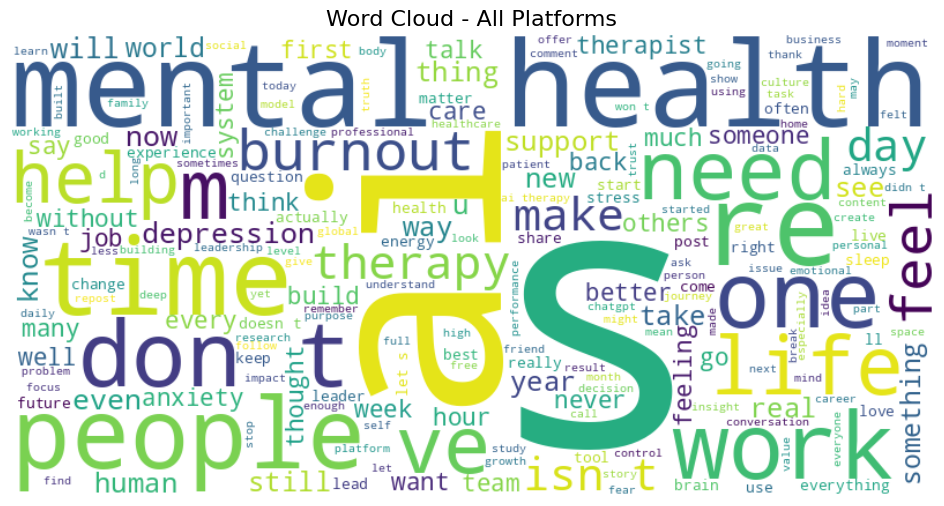

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['clean_content'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - All Platforms", fontsize=16)
plt.show()


In [ ]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Load your file
df = pd.read_csv("all_platforms_combined.csv")

# Basic text cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_content'] = df['content'].apply(clean_text)


In [ ]:
# 3. Stopwords & Exclusions
# ======================
custom_stopwords = set([
    'mental', 'health', 'burnout', 'depression', 'ai', 'therapy',
    'like', 'just', 'thing', 'really', 'get', 'going', 'got',
    'would', 'one', 'even', 'also', 'know', 'say', 'need', 'want',
    'still', 'don', 'think', 'time', 'feel', 'make'
])
contraction_stopwords = ['ve', 'isn', 'don', 'll', 're', 'm', 't', 's']

all_stopwords = custom_stopwords.union(set(ENGLISH_STOP_WORDS))
all_stopwords = all_stopwords.union(contraction_stopwords)



In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_content'] = df['clean_content'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...



🔟 Top 10 Words for LinkedIn
work: 303
people: 290
life: 258
day: 194
help: 193
support: 185
human: 170
let: 166
real: 157
year: 142


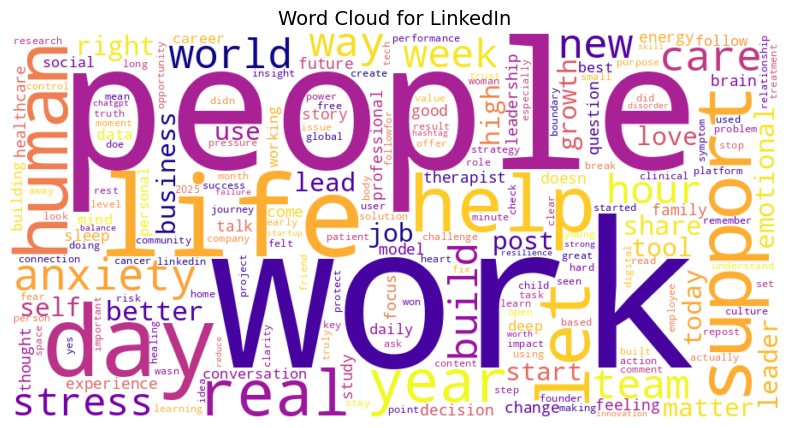


🔟 Top 10 Words for Nitter
people: 43
life: 17
day: 16
issue: 15
year: 15
case: 14
use: 14
today: 13
real: 12
support: 12


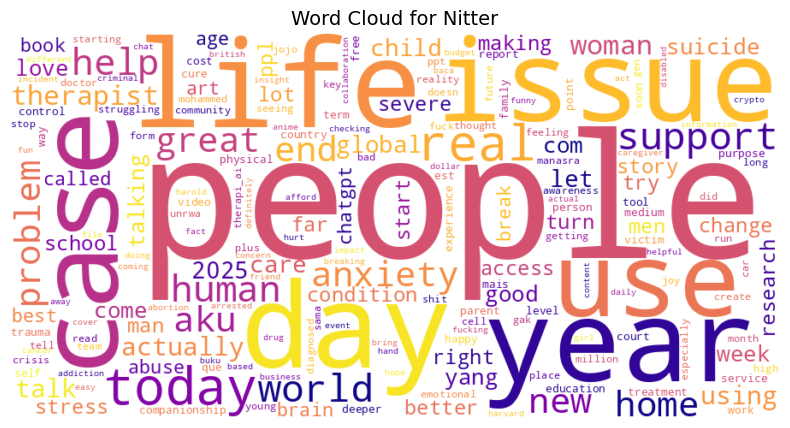


🔟 Top 10 Words for Reddit
therapist: 64
people: 45
help: 43
way: 36
life: 35
work: 35
human: 30
day: 29
year: 29
feeling: 28


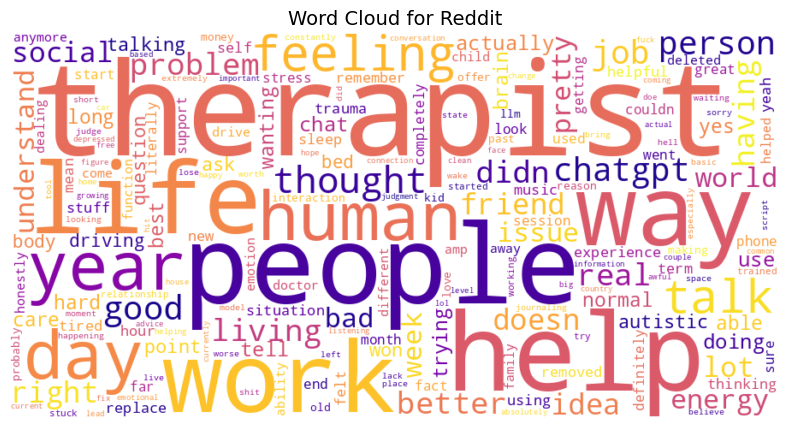

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Reuse your stopword list
all_stopwords = list(all_stopwords)  # Make sure it's a list for CountVectorizer

platforms = df['platform'].unique()

for platform in platforms:
    platform_df = df[df['platform'] == platform]
    text = " ".join(platform_df['clean_content'].dropna())

    # Count vectorization (after lemmatization)
    vectorizer = CountVectorizer(stop_words=all_stopwords)
    X = vectorizer.fit_transform([text])
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

    # Filter short words
    filtered_word_freq = {word: freq for word, freq in word_freq.items() if len(word) > 2}

    # Top 10 words
    top_words = Counter(filtered_word_freq).most_common(10)
    print(f"\n🔟 Top 10 Words for {platform}")
    for word, count in top_words:
        print(f"{word}: {count}")

    # Word cloud
    wordcloud = WordCloud(width=900, height=450, background_color='white', colormap='plasma') \
                .generate_from_frequencies(filtered_word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {platform}", fontsize=14)
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


In [ ]:
# Create one document per platform by combining all lemmatized content
platform_texts = df.groupby("platform")['clean_content'].apply(lambda x: " ".join(x.dropna())).to_dict()


In [ ]:
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=list(all_stopwords), max_features=100)

# Fit-transform the platform texts
platform_docs = list(platform_texts.values())
platform_names = list(platform_texts.keys())

X = tfidf_vectorizer.fit_transform(platform_docs)
tfidf_matrix = pd.DataFrame(X.toarray(), index=platform_names, columns=tfidf_vectorizer.get_feature_names_out())


In [ ]:
# Show top 10 terms per platform
for platform in tfidf_matrix.index:
    print(f"\n🔍 Top TF-IDF terms for {platform}")
    top_terms = tfidf_matrix.loc[platform].sort_values(ascending=False).head(10)
    for term, score in top_terms.items():
        print(f"{term}: {score:.4f}")



🔍 Top TF-IDF terms for LinkedIn
wa: 0.2965
work: 0.2739
people: 0.2622
life: 0.2332
day: 0.1754
help: 0.1745
support: 0.1672
human: 0.1537
let: 0.1501
real: 0.1419

🔍 Top TF-IDF terms for Nitter
people: 0.4863
wa: 0.4637
life: 0.1922
day: 0.1809
ha: 0.1696
year: 0.1696
issue: 0.1696
use: 0.1583
today: 0.1470
real: 0.1357

🔍 Top TF-IDF terms for Reddit
therapist: 0.3814
wa: 0.3694
people: 0.2681
help: 0.2562
way: 0.2145
work: 0.2086
life: 0.2086
human: 0.1788
day: 0.1728
year: 0.1728
